<a href="https://colab.research.google.com/github/SaiDhanyaa/WORK-OUTS/blob/main/NAMED_ENTITY_RECOGNITION_EMOTION_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy
!pip install wordcloud

In [4]:
import numpy as np
import pandas as pd
import string 
import spacy

In [5]:
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [6]:
import pandas
book=pd.read_csv("apple.txt", error_bad_lines=False)

b'Skipping line 6: expected 1 fields, saw 14\n'


In [7]:
book=[x.strip() for x in book.x]
book=[x for x in book if x]
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [9]:
##POS parts of speech tagging
nlp=spacy.load('en_core_web_sm')
one_block=book[2]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)
one_block

"Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it's battery life with sleek look 😍Now talking about MS officeIt's available on app store, free for 1 monthAfter that you will have to pay.You cannot install pirated version but if you install Windows 7 or any other version then u can use Ms office for freeBut in MacBook there are other apps which are good substitute for Ms office appsNumbers for ExcelPages for wordKeynote for PowerPointAnd you can convert your numbers file to Excel file or csv fileSame for the pages & keynoteSo no need of Ms office for me.Cons1. U cannot play games, your laptop will just heat up, battery will drain* U cannot play pubg mobile on emulator if you are pubg lover😁2. Storage 128gb, it will work fine but if you want to store movies or TV shows u can't, u have to buy external hard disk"

In [10]:
##tokenisation
for token in doc_block[0:20]:print(token,token.pos_)

Best ADJ
Laptop NOUN
under ADP
60k NOUN
. PUNCT
If SCONJ
you PRON
do AUX
n't PART
want VERB
any DET
accounting NOUN
softwares NOUN
like SCONJ
tally NOUN
or CCONJ
busy ADJ
then ADV
go VERB
for ADP


In [14]:
#filtering for nouns and verbs only:
nouns_verbs=[token.text for token in doc_block if token.pos_ in('NOUN','VERB')]
print(nouns_verbs[5:25])

['tally', 'go', 'windows', 'term', 'love', 'battery', 'life', 'look', '😍', 'talking', 'app', 'store', 'monthAfter', 'will', 'pay', 'can', 'install', 'version', 'install', 'version']


In [ ]:
#COUNTING TOKENS AGAIN:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(nouns_verbs)
sum_words=x.sum(axis=0)
words_freq=[(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x:x[1], reverse=True)
wf_df=pd.DataFrame(words_freq)
wf_df.columns=['word','count']
wf_df[0:10]
wf_df

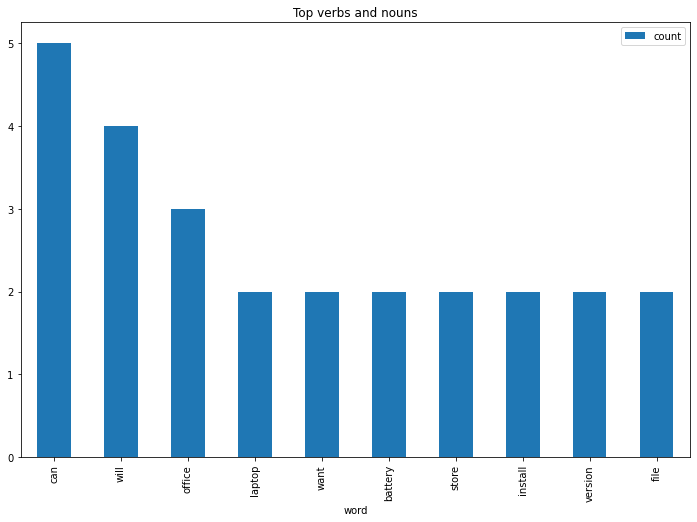

In [17]:
##visualising results
# barchart for top 10 nouns+verbs
wf_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top verbs and nouns')